In [2]:
import pandas as pd
import numpy as np

In [4]:
covid_cases = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [6]:
covid_cases.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [19]:
opening_state = "NY"
import us

def convert_state_to_stateobj(row):
    row["state_obj"] = us.states.lookup(row["state"])
    return row

covid_cases = covid_cases.apply(convert_state_to_stateobj, axis=1)

state_cases = covid_cases[covid_cases["state_obj"] == us.states.lookup(opening_state)].sort_values(by="date")
state_cases

,date,state,fips,cases,deaths,state_obj
246,2020-03-01,New York,36,1,0,New York
261,2020-03-02,New York,36,1,0,New York
276,2020-03-03,New York,36,2,0,New York
293,2020-03-04,New York,36,11,0,New York
313,2020-03-05,New York,36,22,0,New York
338,2020-03-06,New York,36,44,0,New York
369,2020-03-07,New York,36,89,0,New York
404,2020-03-08,New York,36,106,0,New York
440,2020-03-09,New York,36,142,0,New York
478,2020-03-10,New York,36,173,0,New York


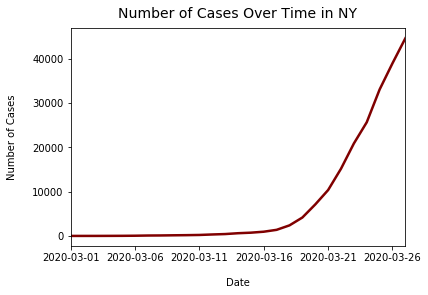

In [52]:
import matplotlib.pyplot as plt

plt, ax = plt.subplots()
state_cases.set_index('date')['cases'].plot(figsize=(6, 4), linewidth=2.5, color='maroon')
ax.set_xlabel("Date", labelpad=15)
ax.set_ylabel("Number of Cases", labelpad=15)
ax.set_title("Number of Cases Over Time in %s" % opening_state, y=1.02, fontsize=14)

plt.savefig("state_cases.png")